In [1]:
from scipy.spatial import distance
import numpy as np

def compute_metrics(embeddings):
    metrics = {
        'cosine_similarity': [],
        'euclidean_distance': [],
        'manhattan_distance': [],
        'chebyshev_distance': [],
        # 'jaccard_similarity': [], # Uncomment if you have a set representation
        'correlation_coefficient': [],
        # 'mahalanobis_distance': [],
        # 'sequential_dependency': [], # Uncomment if implementing
    }
    
    for i in range(len(embeddings) - 1):
        emb1 = embeddings[i]
        emb2 = embeddings[i + 1]

        # Calculating various distances and similarities
        cosine_sim = 1 - distance.cosine(emb1, emb2)
        euclidean_dist = distance.euclidean(emb1, emb2)
        manhattan_dist = distance.cityblock(emb1, emb2)
        chebyshev_dist = distance.chebyshev(emb1, emb2)
        correlation_coeff = np.corrcoef(emb1, emb2)[0, 1]
        # Computing Mahalanobis distance requires the covariance matrix of the data
        # cov_matrix = np.cov(embeddings, rowvar=False)
        # inv_cov_matrix = np.linalg.inv(cov_matrix)
        # mahalanobis_dist = distance.mahalanobis(emb1, emb2, inv_cov_matrix)
        
        metrics['cosine_similarity'].append(cosine_sim)
        metrics['euclidean_distance'].append(euclidean_dist)
        metrics['manhattan_distance'].append(manhattan_dist)
        metrics['chebyshev_distance'].append(chebyshev_dist)
        metrics['correlation_coefficient'].append(correlation_coeff)
        # metrics['mahalanobis_distance'].append(mahalanobis_dist)

    return metrics

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap
from sklearn.manifold import TSNE
import warnings
import re
import random
import ast
warnings.filterwarnings("ignore")

In [3]:
import ast
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [5]:
import pandas as pd

# Initialize lists for embeddings, original text, and metrics
embeddings_list = []
original_text_list = []
metrics_list = []

for i in range(len(gsm_df)):
    question = gsm_df['Prompt'][i]
    cot_reasoning = gsm_df['CoT Sentences'][i]
    cot_reasoning.insert(0, question)
    cot_embeddings = model.encode(cot_reasoning)
    
    embeddings_list.append(cot_embeddings)
    original_text_list.append(cot_reasoning)
    metrics_list.append(compute_metrics(cot_embeddings))

# Convert lists to DataFrame
df = pd.DataFrame(metrics_list)
df['Original_Text'] = original_text_list
df['Embeddings'] = embeddings_list

In [6]:
df.head()

,cosine_similarity,euclidean_distance,manhattan_distance,chebyshev_distance,hamming_distance,correlation_coefficient,mahalanobis_distance,Original_Text,Embeddings
0,"[0.8801451921463013, 0.7670344710350037, 0.852...","[0.48960137367248535, 0.6825914978981018, 0.54...","[7.536451, 10.607793, 8.419762, 11.610573, 11....","[0.093887165, 0.10150642, 0.07866585, 0.112661...",[],"[0.8803598761444615, 0.7672496052033698, 0.852...",[],[Natalia sold clips to 48 of her friends in Ap...,"[[0.01614828, -0.029351933, 0.0584999, 0.00852..."
1,"[0.6554362773895264, 0.5940967798233032, 0.814...","[0.8301370143890381, 0.9010031223297119, 0.608...","[12.900105, 14.372868, 9.58461, 14.169516]","[0.12706465, 0.12599711, 0.09264705, 0.14038853]",[],"[0.655437958897627, 0.5941403041260601, 0.8150...",[],[Weng earns $12 an hour for babysitting. Yeste...,"[[0.025501112, 0.070720375, 0.045118105, 0.035..."
2,"[0.24021361768245697, 0.02471914514899254, -0....","[1.232709527015686, 1.3966251611709595, 1.4177...","[19.127506, 21.4379, 21.750793, 21.151424, 21....","[0.18799166, 0.26126513, 0.2587215, 0.20960441...",[],"[0.24013494329355312, 0.024221623783995894, -0...",[],[Betty is saving money for a new wallet which ...,"[[0.032309357, 0.1453777, -0.010018525, -0.044..."
3,"[0.6580580472946167, 0.7494471073150635, 0.736...","[0.8269726634025574, 0.7078881859779358, 0.726...","[12.498327, 11.115296, 11.418723, 9.297485, 13...","[0.13038614, 0.15314071, 0.10184602, 0.1048508...",[],"[0.6581163686431255, 0.7493348784633765, 0.736...",[],"[Julie is reading a 120-page book. Yesterday, ...","[[0.059824377, 0.07681421, -0.00037508417, -0...."
4,"[0.7879829406738281, 0.7154526114463806, 0.675...","[0.6511790156364441, 0.7543836832046509, 0.806...","[9.990074, 11.697586, 12.563105, 10.63856]","[0.101737, 0.1253978, 0.12956433, 0.13448782]",[],"[0.7879293105394877, 0.7154598566803203, 0.674...",[],[James writes a 3-page letter to 2 different f...,"[[0.012231708, 0.050825935, 0.058782253, -0.02..."


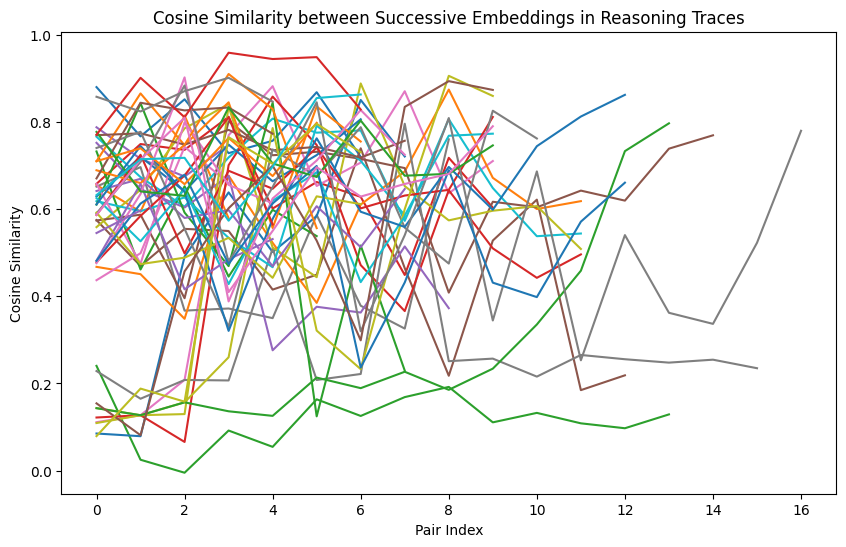

In [7]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))

# Add each sequence to the plot
for i, row in df.iterrows():
    # Generate indices for x-axis
    indices = list(range(len(row['cosine_similarity'])))
    plt.plot(indices, row['cosine_similarity'])

plt.xlabel('Pair Index')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between Successive Embeddings in Reasoning Traces')
plt.show()

In [8]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    return [(val - min_val) / (max_val - min_val) for val in lst]

df['cosine_similarity_normalized'] = df['cosine_similarity'].apply(normalize_list)

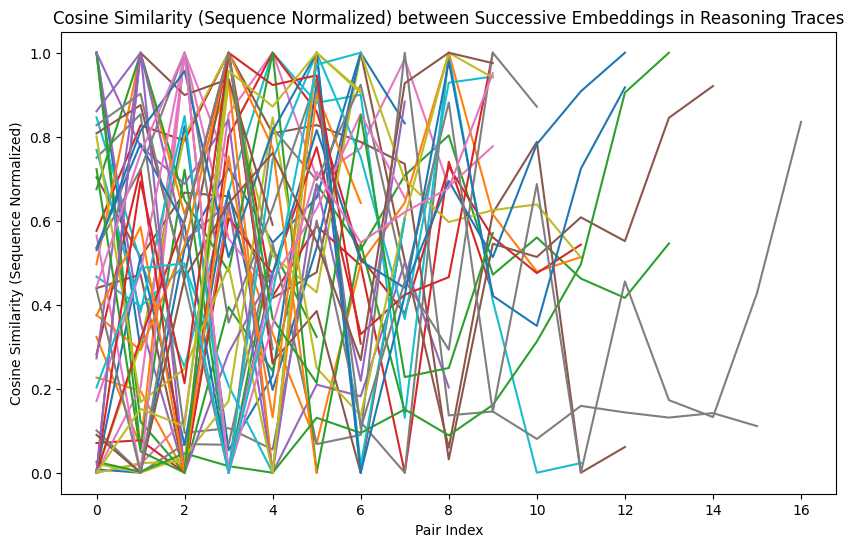

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    indices = list(range(len(row['cosine_similarity_normalized'])))
    plt.plot(indices, row['cosine_similarity_normalized'])

plt.xlabel('Pair Index')
plt.ylabel('Cosine Similarity (Sequence Normalized)')
plt.title('Cosine Similarity (Sequence Normalized) between Successive Embeddings in Reasoning Traces')
plt.show()

In [10]:
df['cosine_similarity_range'] = df['cosine_similarity'].apply(lambda x: max(x) - min(x))

df_sorted = df.sort_values('cosine_similarity_range', ascending=False)

In [11]:
len(df_sorted['Original_Text'][0])

8

In [12]:
for i, row in df_sorted[:2].iterrows():
   print("cosine_similarity_range: ", row['cosine_similarity_range'])
   for i, step in enumerate(row['Original_Text']):
      if i == 0:
         print('Q: ', row['Original_Text'][i])
      else:
         print(f'{i}: ', row['Original_Text'][i])

cosine_similarity_range:  0.8127578645944595
Q:  It's Ava's birthday party. Her parents bought a unicorn piñata for $13 and filled it with all of her favorite treats. They bought 4 bags of Reese's for $9 per bag, 3 bags of Snickers for $5 per bag, and 5 bags of Skittles for $7 per bag. How much did the unicorn piñata and the treats cost altogether?
1:  Sure!
2:  Let's calculate the cost of the treats first.
3:  The cost of 4 bags of Reese's at $9 per bag is 4 x $9 = $<<4*9=36>>36.
4:  The cost of 3 bags of Snickers at $5 per bag is 3 x $5 = $<<3*5=15>>15.
5:  The cost of 5 bags of Skittles at $7 per bag is 5 x $7 = $<<5*7=35>>35.
6:  So, the total cost of the treats is $36 + $15 + $35 = $<<36+15+35=86>>86.
7:  Now, let's add the cost of the unicorn piñata.
8:  The cost of the unicorn piñata is $13.
9:  Therefore, the total cost of the unicorn piñata and treats is $86 + $13 = $<<86+13=99>>99.
10:  So, the unicorn piñata and treats cost altogether $99.
cosine_similarity_range:  0.7927456

In [13]:
cosine_similarity_values = df_sorted[:3]['cosine_similarity'].tolist()[0]
rounded_values = [round(val, 3) for val in cosine_similarity_values]
print(rounded_values)

[0.154, 0.081, 0.457, 0.602, 0.7, 0.528, 0.299, 0.835, 0.894, 0.874]


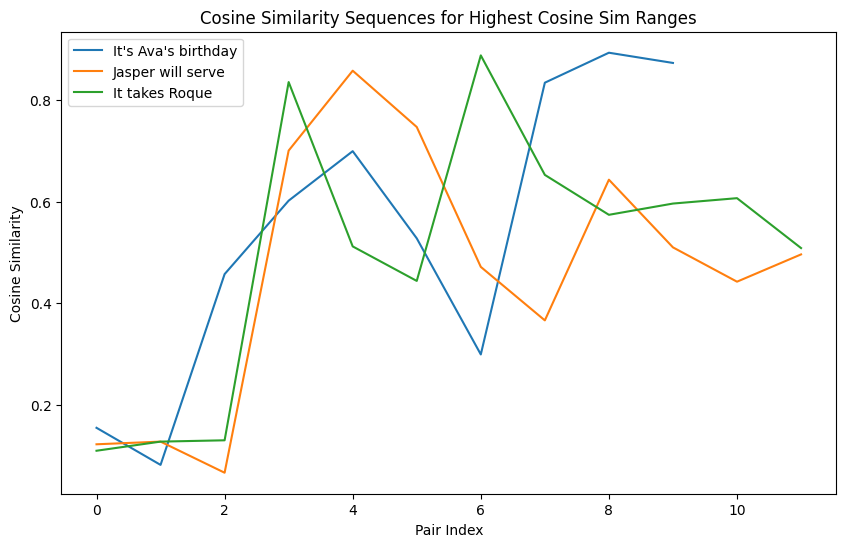

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, row in df_sorted[:3].iterrows():
    indices = list(range(len(row['cosine_similarity'])))
    # Use the first three words of the 'Original_Text' as the label
    label = ' '.join(row['Original_Text'][0].split()[:3])
    plt.plot(indices, row['cosine_similarity'], label=label)

plt.xlabel('Pair Index')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Sequences for Highest Cosine Sim Ranges')
plt.legend()
plt.show()

In [15]:
import matplotlib.pyplot as plt

def plot_metric(df, metric_name, top_n=3, normalize=False, print_orig=False):
    # Sort the DataFrame based on the range of the specified metric
    if normalize:
        # Normalize the metric values if requested
        df[metric_name + '_normalized'] = df[metric_name].apply(lambda x: (x - min(x)) / (max(x) - min(x)))
        metric_column = metric_name + '_normalized'
    else:
        metric_column = metric_name
    
    df_sorted = df.sort_values(by=metric_column, key=lambda x: x.map(lambda y: max(y) - min(y)), ascending=False)

    plt.figure(figsize=(10, 6))

    for i, row in df_sorted[:top_n].iterrows():
        indices = list(range(len(row[metric_column])))
        # Use the first three words of the 'Original_Text' as the label
        label = ' '.join(row['Original_Text'][0].split()[:3])
        plt.plot(indices, row[metric_column], label=label)

    plt.xlabel('Pair Index')
    plt.ylabel(metric_name.capitalize().replace('_', ' '))
    title = f'Top {top_n} {metric_name.capitalize().replace("_", " ")} Range Reasoning Traces'
    if top_n == 50:
        title = f'All {metric_name.capitalize().replace("_", " ")} Range Reasoning Traces'
    plt.title(title)
    if top_n < 5:
        plt.legend()
    plt.show()

    if print_orig:
        for i, row in df_sorted[:top_n].iterrows():
            metric_values = row[metric_name]
            rounded_values = [round(val, 3) for val in metric_values]
            print(f"{metric_name}: ", rounded_values)

            for i, step in enumerate(row['Original_Text']):
                if i == 0:
                    print('Q: ', row['Original_Text'][i])
                else:
                    print(f'{i}: ', row['Original_Text'][i])
            print()

In [16]:
def plot_metric(df, metric_name, n=3, normalize=False, random_sample=False, print_orig=False):
    # Normalize the metric values if requested
    if normalize:
        df[metric_name + '_normalized'] = df[metric_name].apply(lambda x: (x - min(x)) / (max(x) - min(x)))
        metric_column = metric_name + '_normalized'
    else:
        metric_column = metric_name
    
    # Select rows based on sorting or random sampling
    if random_sample:
        df_sampled = df.sample(n)
    else:
        df_sorted = df.sort_values(by=metric_column, key=lambda x: x.map(lambda y: max(y) - min(y)), ascending=False)
        df_sampled = df_sorted[:n]

    plt.figure(figsize=(10, 6))

    for i, row in df_sampled.iterrows():
        indices = list(range(len(row[metric_column])))
        # Use the first three words of the 'Original_Text' as the label
        label = ' '.join(row['Original_Text'][0].split()[:3])
        plt.plot(indices, row[metric_column], label=label)

    plt.xlabel('Pair Index')
    plt.ylabel(metric_name.capitalize().replace('_', ' '))
    title = f'{"Random" if random_sample else "Range Top"} {n} {metric_name.capitalize().replace("_", " ")} Sequences'
    plt.title(title)
    plt.legend()
    plt.show()

    if print_orig:
        for i, row in df_sampled[:n].iterrows():
            metric_values = row[metric_name]
            rounded_values = [round(val, 3) for val in metric_values]
            print(f"{metric_name}: ", rounded_values)

            for i, step in enumerate(row['Original_Text']):
                if i == 0:
                    print('Q: ', row['Original_Text'][i])
                else:
                    print(f'{i}: ', row['Original_Text'][i])
            print()

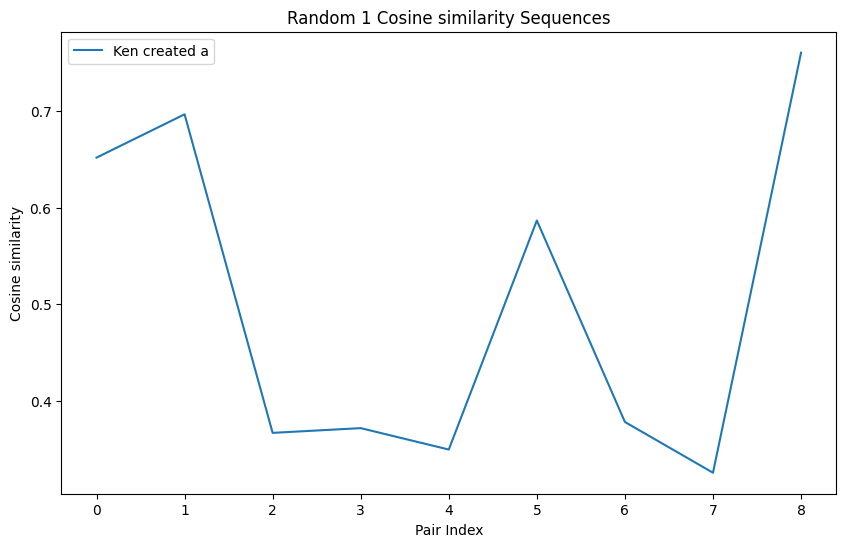

cosine_similarity:  [0.652, 0.697, 0.367, 0.372, 0.35, 0.587, 0.378, 0.326, 0.76]
Q:  Ken created a care package to send to his brother, who was away at boarding school.  Ken placed a box on a scale, and then he poured into the box enough jelly beans to bring the weight to 2 pounds.  Then, he added enough brownies to cause the weight to triple.  Next, he added another 2 pounds of jelly beans.  And finally, he added enough gummy worms to double the weight once again.  What was the final weight of the box of goodies, in pounds?
1:  Step 1: Ken added enough jelly beans to bring the weight to 2 pounds.
2:  So after adding the jelly beans, the weight of the box is 2 pounds.
3:  Step 2: Ken added enough brownies to cause the weight to triple.
4:  Since the weight tripled, the weight of the box is now 2 * 3 = 6 pounds.
5:  Step 3: Ken added another 2 pounds of jelly beans.
6:  After adding the additional jelly beans, the weight of the box is 6 + 2 = 8 pounds.
7:  Step 4: Ken added enough gumm

In [17]:
plot_metric(df, 'cosine_similarity', n=1, random_sample=True, print_orig=True)

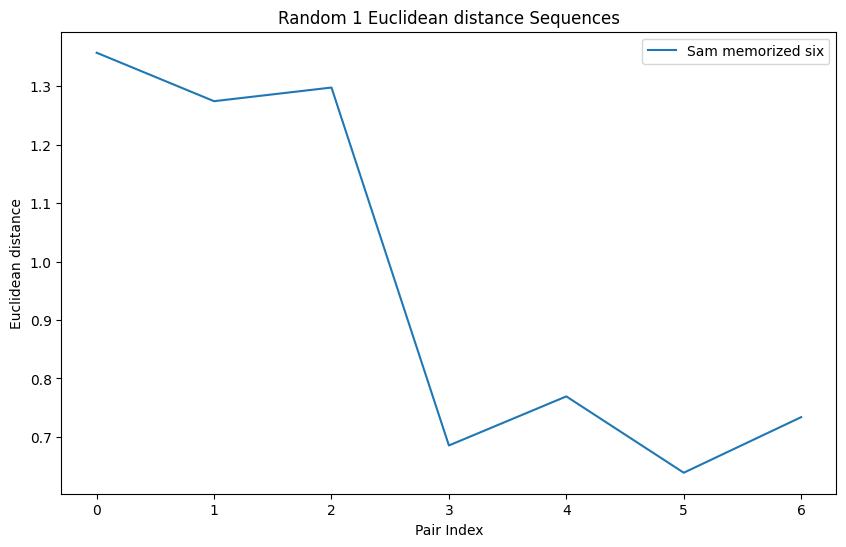

euclidean_distance:  [1.357, 1.274, 1.298, 0.685, 0.769, 0.639, 0.734]
Q:  Sam memorized six more digits of pi than Carlos memorized. Mina memorized six times as many digits of pi as Carlos memorized. If Mina memorized 24 digits of pi, how many digits did Sam memorize?
1:  Sure!
2:  Let's work through this step by step.
3:  We know that Mina memorized 24 digits of pi, which is six times as many as Carlos memorized.
4:  So, Carlos must have memorized 24 divided by 6, which is 4 digits.
5:  Now, we also know that Sam memorized six more digits of pi than Carlos.
6:  Since Carlos memorized 4 digits, Sam must have memorized 4 + 6 = 10 digits.
7:  Therefore, Sam memorized 10 digits of pi.



In [54]:
plot_metric(df, 'euclidean_distance', n=1, random_sample=False, print_orig=True)